In [1]:
#Suppress all tensorflow warnings
import warnings
warnings.filterwarnings("ignore")
from os import environ, chdir
environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

#Import all libraries needed 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
import seaborn as sns

Using TensorFlow backend.


In [2]:
print(plt.style.available)
plt.style.use('seaborn-bright')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [3]:
start_date,end_date ='2012-01-01','2019-12-30'

In [4]:
#Data Load
df = web.DataReader('NVDA', data_source='yahoo', start=start_date, end=end_date)
#Show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.400000,14.010000,14.300000,14.040000,11701100.0,12.922127
2012-01-04,14.260000,13.920000,14.050000,14.200000,8684300.0,13.069386
2012-01-05,14.780000,14.070000,14.130000,14.710000,14088700.0,13.538781
2012-01-06,14.710000,14.370000,14.700000,14.540000,13331300.0,13.382315
2012-01-09,14.820000,14.440000,14.550000,14.540000,12706100.0,13.382315
...,...,...,...,...,...,...
2019-12-23,241.809998,238.389999,240.520004,238.820007,8876500.0,238.677246
2019-12-24,239.309998,236.820007,238.199997,238.619995,3471600.0,238.477356
2019-12-26,240.320007,238.000000,238.759995,239.190002,4571300.0,239.047028


In [5]:
# df information in detail 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
High         2011 non-null float64
Low          2011 non-null float64
Open         2011 non-null float64
Close        2011 non-null float64
Volume       2011 non-null float64
Adj Close    2011 non-null float64
dtypes: float64(6)
memory usage: 110.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ADF8850BE0>,
      dtype=object)

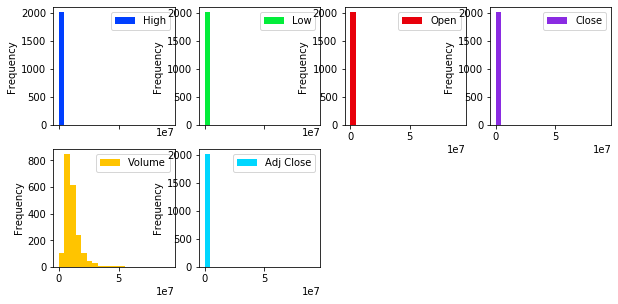

In [6]:
#Plot histogram
df.plot.hist(subplots=True, layout=(4,4), figsize=(10, 10), bins=20)

In [7]:
#Get the shape of dataframe
df.shape

(2011, 6)

In [8]:
df['Close'].dtype

dtype('float64')

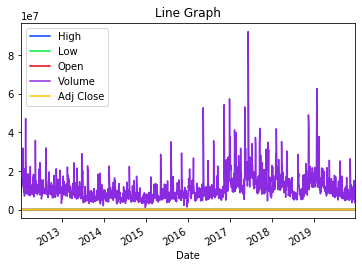

In [9]:
df1=df
#Line graph - showing relationship of Close with respect to other columns
df1.drop(["Close"], axis=1).plot.line(title='Line Graph')

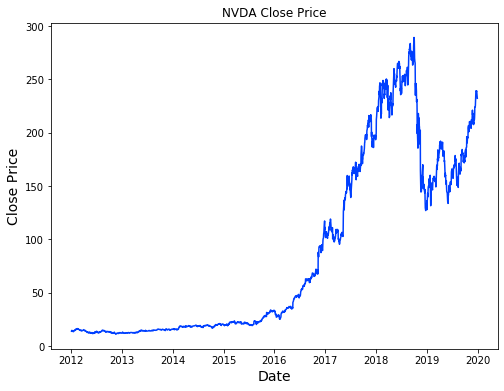

In [10]:
#Visualize the NVDA Close price from 2012 to 2019
plt.figure(figsize=(8,6))
plt.title('NVDA Close Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.show()

Text(0, 0.5, 'Frequency')

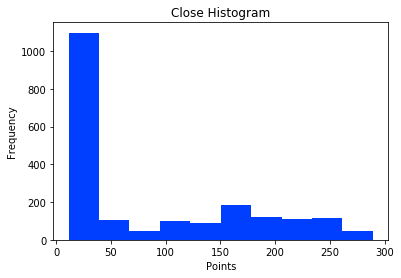

In [11]:
#Visualize Close data using Histogram
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(df['Close'])
# set title and labels
ax.set_title('Close Histogram')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

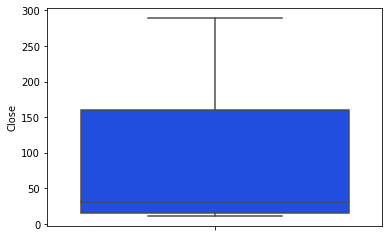

In [12]:
#Visualize Close data using Boxplot
# Make boxplot for one group only
sns.boxplot( y=df["Close"] )
#sns.plt.show()

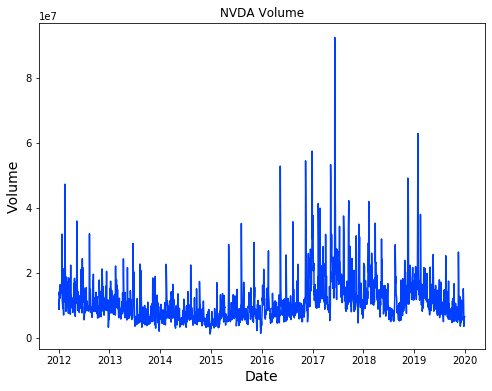

In [13]:
#Visualize the NVDA Volume data from 2012 to 2019
plt.figure(figsize=(8,6))
plt.title('NVDA Volume')
plt.plot(df['Volume'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.show()

Date
2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
                 ...    
2019-12-23    190.164497
2019-12-24    190.941114
2019-12-26    191.827186
2019-12-27    192.674507
2019-12-30    193.460992
Name: Adj Close, Length: 2011, dtype: float64


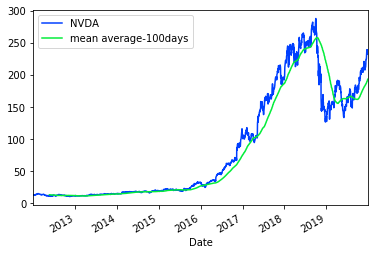

In [15]:
#Visualizing NVDA Avg Close data 100 day window
Adj_close = df['Adj Close']
mavg = Adj_close.rolling(window=100).mean()
print(mavg)

Adj_close.plot(label='NVDA')
mavg.plot(label='mean average-100days')
plt.legend()

Date
2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
                 ...    
2019-12-23    210.010328
2019-12-24    211.054254
2019-12-26    211.913036
2019-12-27    212.768588
2019-12-30    213.531597
Name: Adj Close, Length: 2011, dtype: float64


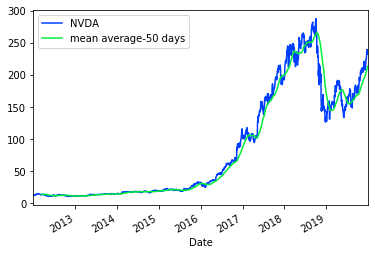

In [16]:
#Visualizing NVDA Avg Close data 
Adj_close = df['Adj Close']
mavg = Adj_close.rolling(window=50).mean()
print(mavg)

Adj_close.plot(label='NVDA')
mavg.plot(label='mean average-50 days')
plt.legend()

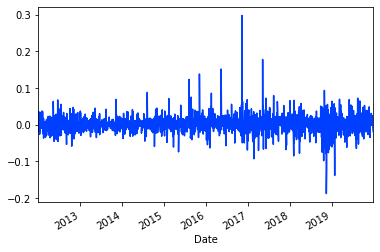

In [17]:
rets = Adj_close / Adj_close.shift(1) - 1
rets.plot(label='return')

In [18]:
#Comparing best Artificial Intelligence stocks
#https://money.usnews.com/investing/stock-market-news/slideshows/artificial-intelligence-stocks-the-10-best-ai-companies
dfcompare = web.DataReader(['NVDA','AMZN','GOOG','FB','CRM','MSFT','BIDU','TWLO','INTC','TCEHY',],'yahoo',start=start_date,end=end_date)['Close']
dfcompare

Symbols,NVDA,AMZN,GOOG,FB,CRM,MSFT,BIDU,TWLO,INTC,TCEHY
Date,,,,,,,,,,
2012-01-03,14.040000,179.029999,331.462585,NaN,25.299999,26.770000,124.290001,0.002400,24.540001,4.104000
2012-01-04,14.200000,177.509995,332.892242,NaN,24.370001,27.400000,121.989998,0.001500,25.110001,4.086000
2012-01-05,14.710000,177.610001,328.274536,NaN,24.692499,27.680000,123.269997,0.001500,25.400000,4.062000
2012-01-06,14.540000,182.610001,323.796326,NaN,25.264999,28.110001,121.089996,0.001500,25.250000,3.990000
2012-01-09,14.540000,178.559998,310.067780,NaN,25.187500,27.740000,120.110001,0.001500,25.469999,4.024000
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,238.820007,1793.000000,1348.839966,206.179993,163.740005,157.410004,128.830002,100.389999,59.230000,48.459999
2019-12-24,238.619995,1789.209961,1343.560059,205.119995,163.250000,157.380005,128.490005,100.550003,59.410000,48.340000
2019-12-26,239.190002,1868.770020,1360.400024,207.789993,164.509995,158.669998,127.580002,102.610001,59.820000,48.810001


In [19]:
dfcompare.head(3)

Symbols,NVDA,AMZN,GOOG,FB,CRM,MSFT,BIDU,TWLO,INTC,TCEHY
Date,,,,,,,,,,
2012-01-03,14.04,179.029999,331.462585,NaN,25.299999,26.77,124.290001,0.0024,24.540001,4.104
2012-01-04,14.20,177.509995,332.892242,NaN,24.370001,27.40,121.989998,0.0015,25.110001,4.086
2012-01-05,14.71,177.610001,328.274536,NaN,24.692499,27.68,123.269997,0.0015,25.400000,4.062


In [20]:
dfcompare.tail(3)

Symbols,NVDA,AMZN,GOOG,FB,CRM,MSFT,BIDU,TWLO,INTC,TCEHY
Date,,,,,,,,,,
2019-12-26,239.190002,1868.770020,1360.400024,207.789993,164.509995,158.669998,127.580002,102.610001,59.820000,48.810001
2019-12-27,236.869995,1869.800049,1351.890015,208.100006,164.979996,158.960007,126.449997,100.430000,60.080002,49.240002
2019-12-30,232.320007,1846.890015,1336.140015,204.410004,162.440002,157.589996,126.290001,97.790001,59.619999,48.619999


In [21]:
type(dfcompare)

pandas.core.frame.DataFrame

In [22]:
#Computes the percentage change from the immediately previous row by default. 
#This is useful in comparing the percentage of change in a time series of elements.

retscomp = dfcompare.pct_change()
retscomp

Symbols,NVDA,AMZN,GOOG,FB,CRM,MSFT,BIDU,TWLO,INTC,TCEHY
Date,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.011396,-0.008490,0.004313,NaN,-0.036759,0.023534,-0.018505,-0.375000,0.023227,-0.004386
2012-01-05,0.035916,0.000563,-0.013871,NaN,0.013233,0.010219,0.010493,0.000000,0.011549,-0.005874
2012-01-06,-0.011557,0.028152,-0.013642,NaN,0.023185,0.015535,-0.017685,0.000000,-0.005905,-0.017725
2012-01-09,0.000000,-0.022178,-0.042399,NaN,-0.003067,-0.013163,-0.008093,0.000000,0.008713,0.008521
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,-0.002298,0.003638,-0.000556,-0.000582,-0.004923,0.000000,0.010511,0.001297,0.004750,0.006438
2019-12-24,-0.000838,-0.002114,-0.003914,-0.005141,-0.002993,-0.000191,-0.002639,0.001594,0.003039,-0.002476
2019-12-26,0.002389,0.044467,0.012534,0.013017,0.007718,0.008197,-0.007082,0.020487,0.006901,0.009723


In [23]:
#Correlation between stocks 
#retscomp.corr() is used to find the pairwise correlation  
correlation = retscomp.corr()
correlation

Symbols,NVDA,AMZN,GOOG,FB,CRM,MSFT,BIDU,TWLO,INTC,TCEHY
Symbols,,,,,,,,,,
NVDA,1.000000,0.353772,0.390498,0.282930,0.397822,0.433033,0.317614,0.023622,0.461080,0.317248
AMZN,0.353772,1.000000,0.555392,0.400437,0.432802,0.476455,0.339449,0.017692,0.330243,0.335261
GOOG,0.390498,0.555392,1.000000,0.414404,0.421621,0.531805,0.394795,0.008419,0.375610,0.372857
FB,0.282930,0.400437,0.414404,1.000000,0.375070,0.312987,0.295485,0.009174,0.262461,0.263313
CRM,0.397822,0.432802,0.421621,0.375070,1.000000,0.460191,0.356107,0.022414,0.350640,0.344746
MSFT,0.433033,0.476455,0.531805,0.312987,0.460191,1.000000,0.328410,0.026576,0.535634,0.359889
BIDU,0.317614,0.339449,0.394795,0.295485,0.356107,0.328410,1.000000,0.010206,0.303571,0.433013
TWLO,0.023622,0.017692,0.008419,0.009174,0.022414,0.026576,0.010206,1.000000,0.030988,0.018495
INTC,0.461080,0.330243,0.375610,0.262461,0.350640,0.535634,0.303571,0.030988,1.000000,0.321773


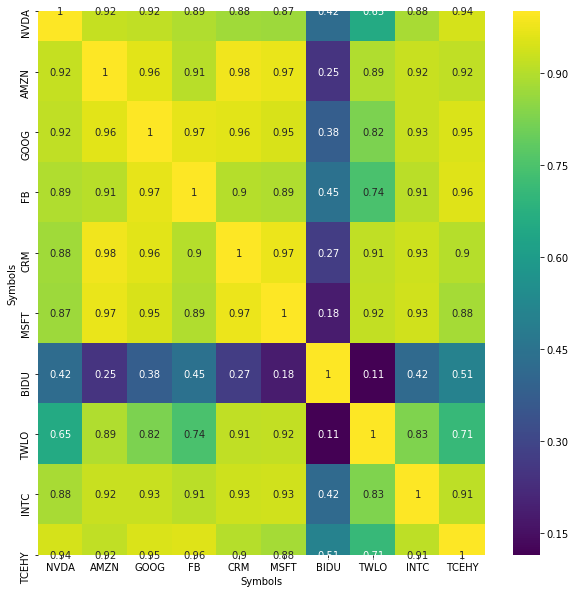

In [24]:
#Heat Map with correlation values provide correlations among columns is by visualizing the 
#The stronger the color, the larger the correlation magnitude. 

#Heat map is created using Seaborn library
plt.figure(figsize=(10,10))
sns.heatmap(dfcompare.corr(), annot=True,cmap = 'viridis')
# looking for strong correlations with "class" row

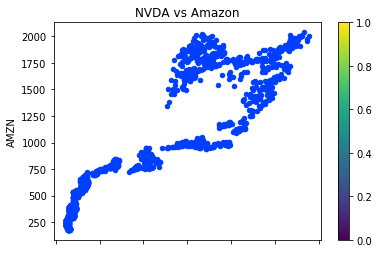

In [25]:
dfcompare.plot.scatter(x='NVDA', y='AMZN', title='NVDA vs Amazon',colormap='viridis')

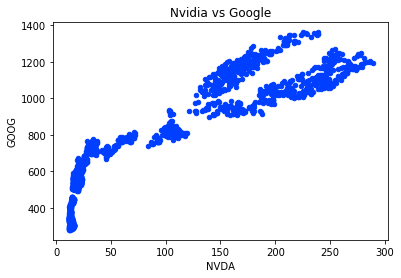

In [26]:
dfcompare.plot.scatter(x='NVDA', y='GOOG', title='Nvidia vs Google')

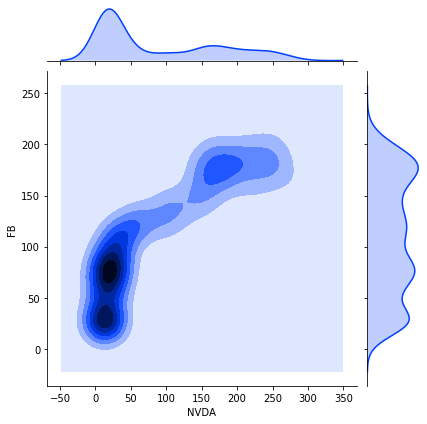

In [28]:
#seaborn.jointplot- Draw a plot of two variables with bivariate and univariate graphs.
# joint relationship between two variables 

sns.jointplot(x=dfcompare["NVDA"], y=dfcompare["FB"],title='Nvidia vs Facebook', kind='kde')

In [29]:
#Create a new dataframe with only the 'Close column as it is the only column needed to learn the trend
Close_data = df.filter(['Close'])
Close_data


,Close
Date,
2012-01-03,14.040000
2012-01-04,14.200000
2012-01-05,14.710000
2012-01-06,14.540000
2012-01-09,14.540000
...,...
2019-12-23,238.820007
2019-12-24,238.619995
2019-12-26,239.190002


In [30]:
#We need numpy array created out of Close_data dataframe
Close_data_numpy = Close_data.values
Close_data_numpy

array([[ 14.03999996],
       [ 14.19999981],
       [ 14.71000004],
       ...,
       [239.19000244],
       [236.86999512],
       [232.32000732]])

In [31]:
#Divide the data into Training and Test data 
Train_Test_Split_ratio=0.8
Training_Data_count=math.ceil(len(Close_data_numpy)*Train_Test_Split_ratio)

#Print the number of Training data and Test Count
print("Training data count is {0} while Test Data count is {1}".format(Training_Data_count,len(Close_data_numpy)-Training_Data_count))


Training data count is 1609 while Test Data count is 402


In [32]:
#Print first 5 values 
for i in range(5):
    print(Close_data_numpy[i])

[14.03999996]
[14.19999981]
[14.71000004]
[14.53999996]
[14.53999996]


In [33]:
#Print last set of values (5 values)
for i in range(1,6):
    print(Close_data_numpy[-i])

[232.32000732]
[236.86999512]
[239.19000244]
[238.61999512]
[238.82000732]


In [34]:
Close_data_numpy

array([[ 14.03999996],
       [ 14.19999981],
       [ 14.71000004],
       ...,
       [239.19000244],
       [236.86999512],
       [232.32000732]])

In [35]:
#Scale the data before splitting the data
scaler = MinMaxScaler(feature_range=(0,1))
Close_data_numpy_scaled = scaler.fit_transform(Close_data_numpy)
Close_data_numpy_scaled

array([[0.00956903],
       [0.01014461],
       [0.01197928],
       ...,
       [0.81951944],
       [0.81117349],
       [0.79480545]])

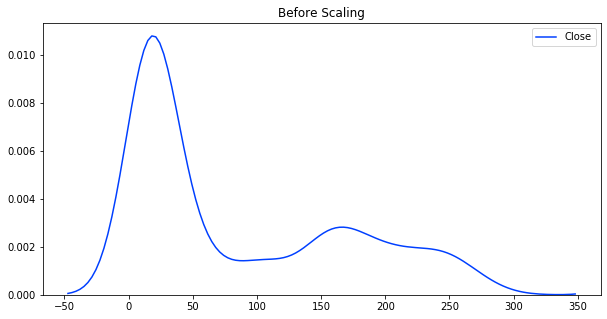

In [36]:
# Before & After Mean normalization
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Close'], ax=ax1)

In [38]:
#Training and test data is now divided
Training_data = Close_data_numpy_scaled[0:Training_Data_count , :]

print("Shape of Training data is {0} ".format(Training_data.shape))
print("Number of data in the Training set is ",len(Training_data))

print("Training data is from index 0 to {0}".format(Training_Data_count-1))
print("Testing data starts from index {} to {}".format(Training_Data_count,len(Close_data_numpy)))

Shape of Training data is (1609, 1) 
Number of data in the Training set is  1609
Training data is from index 0 to 1608
Testing data starts from index 1609 to 2011


In [39]:
#Now we will go ahead and start splitting the data based on our batch size
batch_size=60
batch_x_training_data = []
batch_y_training_data = []

#range with start and stop 60->len(training_data)-1
for i in range(batch_size, len(Training_data)):
    #0 refers to column ,i starts from batch_size,x_train will have data from 0->batch_size-1
    batch_x_training_data.append(Training_data[i-batch_size:i, 0]) 
    #batch_y_training_data will have index 60,61,62....if batch size is 60 
    batch_y_training_data.append(Training_data[i, 0])
    if i<= batch_size:#say if batch size=60 then i<=60 so only 1 value will be in batch_y_training_data
        print(batch_x_training_data)
        print(batch_y_training_data)
        print()
    if i<= batch_size+1:#say if batch size=60 ,we have two batch when i<=61 so batch_y_training_data will have 2 values
        print(batch_x_training_data)
        print(batch_y_training_data)
        print()


[array([0.00956903, 0.01014461, 0.01197928, 0.01136772, 0.01136772,
       0.01115188, 0.01010864, 0.00978488, 0.00845384, 0.0076984 ,
       0.00935319, 0.01068422, 0.01021656, 0.01161954, 0.01280668,
       0.01248291, 0.01197928, 0.01269876, 0.01230304, 0.01219512,
       0.0127707 , 0.01478524, 0.01597237, 0.01554069, 0.01568458,
       0.01773509, 0.01769911, 0.01626016, 0.01715951, 0.01748327,
       0.01723146, 0.01823873, 0.0160803 , 0.01636809, 0.01597237,
       0.01629614, 0.01586445, 0.01471329, 0.01420966, 0.01356213,
       0.01392187, 0.01438953, 0.01251889, 0.01201525, 0.01233902,
       0.01251889, 0.01237499, 0.01154759, 0.01226707, 0.01075617,
       0.01151162, 0.01158357, 0.01172746, 0.01086409, 0.01107993,
       0.01100798, 0.0114037 , 0.01201525, 0.01237499, 0.0135981 ])]
[0.01384991593733375]

[array([0.00956903, 0.01014461, 0.01197928, 0.01136772, 0.01136772,
       0.01115188, 0.01010864, 0.00978488, 0.00845384, 0.0076984 ,
       0.00935319, 0.01068422, 0.01

In [40]:
print("Number of batches: {} obtained with batch size : {}".format(len(batch_x_training_data),batch_size))
#We will have below number of batches available for training based on our batch sizes

#for batch size 60
#1549 batches will have 60 items each
#len(batch_x_training_data or batch_y_training_data) =1549

Number of batches: 1549 obtained with batch size : 60


In [41]:
#For double checking we are printing the value of 1st batch value from data
print("Actual data value at the end of 60 days :{0}, Value from batch_y_training_data {1}".format(Training_data[60, 0],batch_y_training_data[0]))

Actual data value at the end of 60 days :0.01384991593733375, Value from batch_y_training_data 0.01384991593733375


In [42]:
#list within list ,initially with every list having 60 values
batch_x_training_data

[array([0.00956903, 0.01014461, 0.01197928, 0.01136772, 0.01136772,
        0.01115188, 0.01010864, 0.00978488, 0.00845384, 0.0076984 ,
        0.00935319, 0.01068422, 0.01021656, 0.01161954, 0.01280668,
        0.01248291, 0.01197928, 0.01269876, 0.01230304, 0.01219512,
        0.0127707 , 0.01478524, 0.01597237, 0.01554069, 0.01568458,
        0.01773509, 0.01769911, 0.01626016, 0.01715951, 0.01748327,
        0.01723146, 0.01823873, 0.0160803 , 0.01636809, 0.01597237,
        0.01629614, 0.01586445, 0.01471329, 0.01420966, 0.01356213,
        0.01392187, 0.01438953, 0.01251889, 0.01201525, 0.01233902,
        0.01251889, 0.01237499, 0.01154759, 0.01226707, 0.01075617,
        0.01151162, 0.01158357, 0.01172746, 0.01086409, 0.01107993,
        0.01100798, 0.0114037 , 0.01201525, 0.01237499, 0.0135981 ]),
 array([0.01014461, 0.01197928, 0.01136772, 0.01136772, 0.01115188,
        0.01010864, 0.00978488, 0.00845384, 0.0076984 , 0.00935319,
        0.01068422, 0.01021656, 0.01161954, 0.

In [43]:
batch_y_training_data

[0.01384991593733375,
 0.014461471032384689,
 0.01420965543938612,
 0.013310310114985346,
 0.011763435059182377,
 0.01169148921721,
 0.011007984849456524,
 0.01000071904673211,
 0.010648248778134313,
 0.011871358968236177,
 0.01000071904673211,
 0.009389163951681177,
 0.009497087860734978,
 0.008957478607656423,
 0.00820202839793057,
 0.00723073723155742,
 0.006655153342127601,
 0.005180227559027167,
 0.006115547519779198,
 0.006151522156130469,
 0.005755808017726835,
 0.005827757290429364,
 0.006655153342127601,
 0.005288151468080968,
 0.004496726622003844,
 0.0031656959535783236,
 0.003921146163304176,
 0.0038851715269529116,
 0.0040650412779790965,
 0.003741276412277998,
 0.0065832075001552165,
 0.006295417270805383,
 0.005827757290429364,
 0.0048924373296773335,
 0.004568672463976228,
 0.002518166222176127,
 0.0032736164319019795,
 0.0027340106095535763,
 0.0038132222542503758,
 0.002626086700499776,
 0.0036693271395754623,
 0.004820491487704949,
 0.0042808822346263944,
 0.00377725

In [44]:
#Create Numpy arrays from batch_x_training_data and batch_y_training_data
batch_x_training_data, batch_y_training_data = np.array(batch_x_training_data), np.array(batch_y_training_data)

In [45]:
#numpy array with list within another list 
batch_x_training_data

array([[0.00956903, 0.01014461, 0.01197928, ..., 0.01201525, 0.01237499,
        0.0135981 ],
       [0.01014461, 0.01197928, 0.01136772, ..., 0.01237499, 0.0135981 ,
        0.01384992],
       [0.01197928, 0.01136772, 0.01136772, ..., 0.0135981 , 0.01384992,
        0.01446147],
       ...,
       [0.84610409, 0.84423343, 0.82962807, ..., 0.85016915, 0.84380177,
        0.83768623],
       [0.84423343, 0.82962807, 0.79440974, ..., 0.84380177, 0.83768623,
        0.83214623],
       [0.82962807, 0.79440974, 0.80998635, ..., 0.83768623, 0.83214623,
        0.84955754]])

In [46]:
batch_y_training_data

array([0.01384992, 0.01446147, 0.01420966, ..., 0.83214623, 0.84955754,
       0.85009718])

In [47]:
#So we have 1543 batches with 60 values each
#60 columns 1st column have 0-59 data,2nd column will have 1-60 data,3rd column will have 2-61,
#4th column 3-62,5th column 4-63 
batch_x_training_data.shape

(1549, 60)

In [49]:
batch_y_training_data.shape

(1549,)

In [50]:
#now batch_x_training_data is a numpy array and each item is a array of 60 items
batch_x_training_data[0,59] #this is the last element in the first batch 

0.01359810034433518

In [51]:
batch_x_training_data[1,59] #this is the last element in the second batch 

0.01384991593733375

In [52]:
#Reshape the data
#x_train shape which is 1549,60 is converted into 3 dimensional for LSTM purpose
#np.reshape(original shape,new shape)
#[number of samples, number of time steps, and number of features]

#You always have to give a three-dimensional array as an input to your LSTM network. 
#Where the first dimension represents the batch size, the second dimension represents the time-steps 
#and the third dimension represents the number of units in one input sequence.

batch_x_training_data = np.reshape(batch_x_training_data, (batch_x_training_data.shape[0], batch_x_training_data.shape[1], 1))
batch_x_training_data.shape

(1549, 60, 1)

In [53]:
warnings.filterwarnings("ignore")

#Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (batch_x_training_data.shape[1], 1)))
model.add(LSTM(100, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#Compile model 
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 100)           40800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [54]:
#Configuration details of the model
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'LSTM',
   'config': {'name': 'lstm_1',
    'trainable': True,
    'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'units': 100,
    'activation': 'tanh',
    'recurrent_activation': 'hard_sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'unit_forget_bias': True,
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None,
    'bias_constraint'

In [55]:
#Find the layers in the model 
model.layers

In [56]:
#Fit model for respective epochs
#batch_size=1 will make sure we are not seoerating the data as batches 
#epochs=1 means we just want one iteration to go through whole data 
history=model.fit(batch_x_training_data, batch_y_training_data, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
1549/1549 [==============================] - 179s 116ms/step - loss: 0.0016


In [57]:
#To find the history(loss values) saved in the model
history.history

{'loss': [0.0016008245575973696]}

In [58]:
#To find how the weights have been updated during model training
model.get_weights()

[array([[-9.59640965e-02, -1.21418415e-02, -3.24293450e-02,
          8.09200630e-02, -1.43532544e-01,  7.27858208e-03,
         -7.24596232e-02, -8.75474960e-02,  8.50909576e-02,
          6.30199015e-02, -9.25732404e-02, -4.30107154e-02,
          4.00005393e-02, -9.37925652e-02, -8.16581696e-02,
         -8.42675865e-02,  1.32243127e-01, -3.12097501e-02,
         -7.69395605e-02, -9.71360132e-03,  9.38817784e-02,
         -1.78892180e-01,  2.31603738e-02,  2.43911073e-02,
          8.01657587e-02,  1.78096313e-02,  2.04938091e-02,
          4.89663631e-02,  1.02136821e-01,  8.72278139e-02,
          1.00382619e-01, -6.04012758e-02,  1.01985648e-01,
         -1.10716661e-02,  1.18130632e-01,  9.50384140e-02,
         -7.59513676e-02,  9.37422514e-02, -3.31753530e-02,
         -6.15233742e-02, -4.40678485e-02,  9.32319015e-02,
          6.50720894e-02,  2.68149320e-02, -6.25704005e-02,
          6.64666891e-02, -9.15667117e-02,  8.00481439e-02,
         -1.53462356e-02,  3.96197997e-0

In [59]:
#weights at each layer
for weight in model.get_weights():
    print (weight.shape)

(1, 400)
(100, 400)
(400,)
(100, 400)
(100, 400)
(400,)
(100, 25)
(25,)
(25, 1)
(1,)


In [34]:
#Model saved as ckd
model.save("predictclose.model")

In [68]:
#Create the testing data set
#Testing data starts from index 1609 to 2011
#Create a new array containing scaled values from index 1609 to 2011
Testing_data = Close_data_numpy_scaled[Training_Data_count - batch_size: , :]
print("Training data is from index 0 to {0}".format(Training_Data_count-1))
print("Testing data starts from index {} to {}".format(Training_Data_count,len(Close_data_numpy)))
#Create the data sets batch_x_testing_data and batch_y_testing_data
batch_x_testing_data = []
batch_y_testing_data = Close_data_numpy[Training_Data_count:, :]
for i in range(batch_size, len(Testing_data)):
    batch_x_testing_data.append(Testing_data[i-batch_size:i, 0])

Training data is from index 0 to 1608
Testing data starts from index 1609 to 2011


In [69]:
batch_size

60

In [70]:
#we will get 402 + 60 data from 1 batch earlier = 462
len(Testing_data)

462

In [65]:
Testing_data.shape

(462, 1)

In [66]:
batch_x_testing_data

[array([0.79440974, 0.80998635, 0.80678468, 0.83020367, 0.82905248,
        0.8266782 , 0.84160736, 0.85754373, 0.85016915, 0.85387444,
        0.85603284, 0.86013385, 0.82603069, 0.85689623, 0.85322689,
        0.82908849, 0.79714373, 0.83854956, 0.77034325, 0.75534217,
        0.79217932, 0.75426295, 0.7697317 , 0.77293336, 0.75545009,
        0.72980074, 0.73397372, 0.77894099, 0.77293336, 0.80300747,
        0.79185557, 0.79181962, 0.81358373, 0.8093748 , 0.78300599,
        0.7818189 , 0.76444354, 0.75480253, 0.73847045, 0.76926402,
        0.77325712, 0.76811283, 0.77617099, 0.77318515, 0.79721569,
        0.81905176, 0.85365856, 0.85984606, 0.87919998, 0.89484861,
        0.87470326, 0.87768909, 0.84243474, 0.84405355, 0.85016915,
        0.84380177, 0.83768623, 0.83214623, 0.84955754, 0.85009718]),
 array([0.80998635, 0.80678468, 0.83020367, 0.82905248, 0.8266782 ,
        0.84160736, 0.85754373, 0.85016915, 0.85387444, 0.85603284,
        0.86013385, 0.82603069, 0.85689623, 0.

In [67]:
#we have 400 batches of 60 data each in batch_x_testing_data while 60 data in batch_y_testing_data
print("Number of data in batch_x_testing_data : {0} and batch_y_testing_data : {1}".format(len(batch_x_testing_data),len(batch_x_testing_data))) 


Number of data in batch_x_testing_data : 402 and batch_y_testing_data : 402


In [71]:
#So will have 60 data in 1 list
batch_x_testing_data[0]

#Similarly we will have 402 batches 

array([0.79440974, 0.80998635, 0.80678468, 0.83020367, 0.82905248,
       0.8266782 , 0.84160736, 0.85754373, 0.85016915, 0.85387444,
       0.85603284, 0.86013385, 0.82603069, 0.85689623, 0.85322689,
       0.82908849, 0.79714373, 0.83854956, 0.77034325, 0.75534217,
       0.79217932, 0.75426295, 0.7697317 , 0.77293336, 0.75545009,
       0.72980074, 0.73397372, 0.77894099, 0.77293336, 0.80300747,
       0.79185557, 0.79181962, 0.81358373, 0.8093748 , 0.78300599,
       0.7818189 , 0.76444354, 0.75480253, 0.73847045, 0.76926402,
       0.77325712, 0.76811283, 0.77617099, 0.77318515, 0.79721569,
       0.81905176, 0.85365856, 0.85984606, 0.87919998, 0.89484861,
       0.87470326, 0.87768909, 0.84243474, 0.84405355, 0.85016915,
       0.84380177, 0.83768623, 0.83214623, 0.84955754, 0.85009718])

In [72]:
#Convert the data to a numpy array
batch_x_testing_data = np.array(batch_x_testing_data)

#Reshape the data
batch_x_testing_data = np.reshape(batch_x_testing_data, (batch_x_testing_data.shape[0], batch_x_testing_data.shape[1], 1 ))


In [73]:
#Final shape of the training and testing dataset used in our model 
print("*******************************************************************")
print("Training data shape: ", batch_x_training_data.shape)
print("Test data shape    : ", batch_x_testing_data.shape )
print("*******************************************************************")

*******************************************************************
Training data shape:  (1549, 60, 1)
Test data shape    :  (402, 60, 1)
*******************************************************************


In [74]:
#Obtain model predictions for testing data based on the model we created using training data 
predict_close = model.predict(batch_x_testing_data)
#Reverse the values back to unscaled data
predict_close = scaler.inverse_transform(predict_close)

In [75]:
#RMSE calculates how well the model has predicted the values
root_mean_square_value=np.sqrt(np.mean(((predict_close- batch_y_testing_data)**2)))
root_mean_square_value

11.5923518804296

In [76]:
#Obtain model predictions for training data based on the model we created using training data 
predict_close_train = model.predict(batch_x_training_data)
#Reverse the values back to unscaled data
predict_close_train = scaler.inverse_transform(predict_close_train)
#RMSE calculates how well the model has predicted the values
root_mean_square_value_train=np.sqrt(np.mean(((predict_close_train- batch_y_training_data)**2)))
root_mean_square_value_train

92.93121522313963

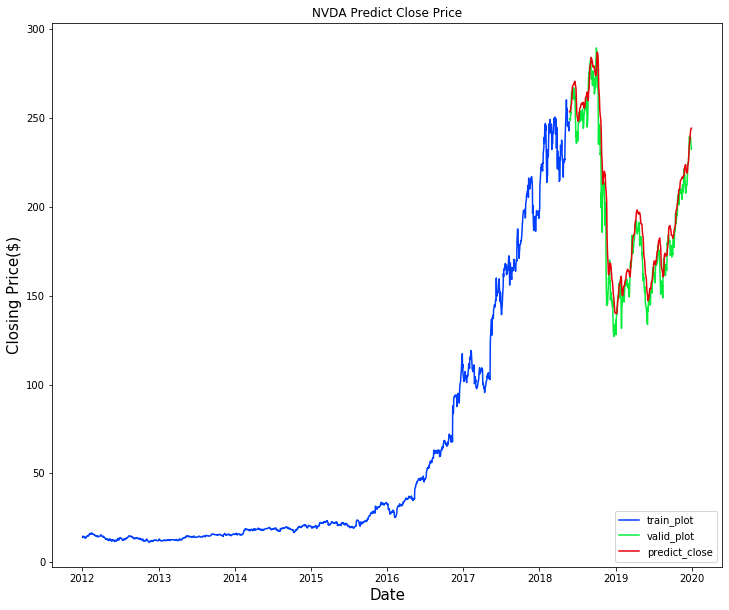

In [77]:
#Training data from 0-1608
train_plot = Close_data[:Training_Data_count]

#Testing data from 1609 to 2011
valid_plot = Close_data[Training_Data_count:] 

#Assign the predictions made earlier into the new colum predict_close of valid_plot
valid_plot['predict_close'] = predict_close 

#Visualize the Training and testing data along with actual and predicted Closing value
plt.figure(figsize=(12,10))
plt.title('NVDA Predict Close Price')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Closing Price($)', fontsize=15)
plt.plot(train_plot['Close'])
plt.plot(valid_plot[['Close', 'predict_close']])
plt.legend(['train_plot', 'valid_plot', 'predict_close'], loc='lower right')
plt.show()

In [78]:
#valid_plot has two columns i.e actual close price and predicted close price
valid_plot.head(5)

,Close,predict_close
Date,,
2018-05-25,249.279999,253.417389
2018-05-29,248.589996,253.984177
2018-05-30,252.990005,254.503876
2018-05-31,252.190002,255.621246
2018-06-01,257.619995,256.650452


In [79]:
valid_plot.tail(5)

,Close,predict_close
Date,,
2019-12-23,238.820007,237.471481
2019-12-24,238.619995,240.063431
2019-12-26,239.190002,242.029114
2019-12-27,236.869995,243.517197
2019-12-30,232.320007,244.203186


In [82]:
#batch_size=60

#Data pulled between '2012-01-01' to '2019-12-30' to predict the closing price for '2019-12-31'
NVDA_quote = web.DataReader('NVDA', data_source='yahoo', start=start_date, end=end_date)

#NVDA_quote_Close to store only Close value for NVDA
NVDA_quote_Close = NVDA_quote.filter(['Close'])

#We are only going to make use of last 60 days data to get the value for 31st December closing price
Last_batch_size_quote = NVDA_quote_Close[-batch_size:].values

#Data preprocessing for conversion of data to scaled version
Last_batch_size_quote_scaled = scaler.transform(Last_batch_size_quote)

#Store the last 60 days scaled data into new array and transform that into numpy array 
new_testing_data = []
new_testing_data.append(Last_batch_size_quote_scaled)
new_testing_data = np.array(new_testing_data)

#Change the shape for LSTM purpose
new_testing_data = np.reshape(new_testing_data, (new_testing_data.shape[0], new_testing_data.shape[1], 1))

#Obtain the predicted price for this 60 days data
new_testing_data_predicted_close_price = model.predict(new_testing_data) #now predicting for Dec 31st, 2019 

#We need to undo the scaling of data to compare against actual closing price
new_testing_data_predicted_close_price = scaler.inverse_transform(new_testing_data_predicted_close_price)

print("NVDA's Predicted Closing Price for 2019-12-31 is : ", new_testing_data_predicted_close_price[0][0])
print("*******************************************************************")
print("NVDA's Actual Closing Price")
#Obtain the actual closing price for Dec 31st, 2019 
test_date = '2019-12-31'
NVDA_quote2 = web.DataReader('NVDA', data_source='yahoo', start=test_date, end=test_date) #check price for dec 18 and 19
print(NVDA_quote2['Close'])

NVDA's Predicted Closing Price for 2019-12-31 is :  243.74408
*******************************************************************
NVDA's Actual Closing Price
Date
2019-12-31    235.300003
Name: Close, dtype: float64


In [88]:
#batch_size=60

#Data pulled between '2012-01-01' to '2020-01-15' to predict the closing price for '2020-01-16'
NVDA_quote = web.DataReader('NVDA', data_source='yahoo', start=start_date, end='2020-01-15')

#NVDA_quote_Close to store only Close value for NVDA
NVDA_quote_Close = NVDA_quote.filter(['Close'])

#We are only going to make use of last 60 days data to get the value for Jan 16th,2020 closing price
Last_batch_size_quote = NVDA_quote_Close[-batch_size:].values

#Data preprocessing for conversion of data to scaled version
Last_batch_size_quote_scaled = scaler.transform(Last_batch_size_quote)

#Store the last 60 days scaled data into new array and transform that into numpy array 
new_testing_data = []
new_testing_data.append(Last_batch_size_quote_scaled)
new_testing_data = np.array(new_testing_data)
#Change the shape for LSTM purpose
new_testing_data = np.reshape(new_testing_data, (new_testing_data.shape[0], new_testing_data.shape[1], 1))

#Obtain the predicted price for this 60 days data
new_testing_data_predicted_close_price = model.predict(new_testing_data) #now predicting for April 1st 

#We need to undo the scaling of data to compare against actual closing price
new_testing_data_predicted_close_price = scaler.inverse_transform(new_testing_data_predicted_close_price)

print("NVDA's Predicted Closing Price for 2020-01-16 is : ", new_testing_data_predicted_close_price[0][0])
print("*******************************************************************")
print("NVDA's Actual Closing Price")
#Obtain the actual closing price for Jan 16th, 2020 
test_date = '2020-01-16'
NVDA_quote2 = web.DataReader('NVDA', data_source='yahoo', start=test_date, end=test_date) 
print(NVDA_quote2['Close'])

NVDA's Predicted Closing Price for 2020-01-16 is :  252.51556
*******************************************************************
NVDA's Actual Closing Price
Date
2020-01-16    248.929993
Name: Close, dtype: float64
